In [1]:
import pickle
import numpy as np

In [2]:
d_num = pickle.load(open("test/diacritized_num.pkl", "rb"))
d_accurate = pickle.load(open("test/diacirtized_accurate.pkl", "rb"))
d_wrong = pickle.load(open("test/diacritized_wrong.pkl", "rb"))


nd_num = pickle.load(open("test/non_diacritized_num.pkl", "rb"))
nd_accurate = pickle.load(open("test/non_diacirtized_accurate.pkl", "rb"))
nd_wrong = pickle.load(open("test/non_diacritized_wrong.pkl", "rb"))


In [3]:
#Overall
(sum(v for i,v in d_accurate.items())+ nd_accurate )/(sum(v for i,v in d_num.items())  + nd_num)

0.852622274593706

In [4]:
#Only at non_diacritized text
# Tonal
import pandas as pd
d_accurate_df = pd.DataFrame([(k,k,v, d_num[k]) for k,v in d_accurate.items()], columns = ["let", "pred","count","overall"])

In [5]:
d_wrong_df = pd.DataFrame([(k, wrong_k, d_wrong[k][wrong_k], d_num[k]) for k in d_wrong for wrong_k in d_wrong[k] ], columns = ["let","pred","count", "overall"] )

In [6]:
diacritics_df = pd.concat([d_accurate_df, d_wrong_df])

In [7]:
diacritics_df["percent"] = diacritics_df["count"]/diacritics_df["overall"]

In [8]:
diacritics_df

,let,pred,count,overall,percent
0,à,à,269048,338613,0.794559
1,á,á,131010,207889,0.630192
2,ị,ị,25039,64950,0.385512
3,ì,ì,15866,46930,0.338078
4,ự,ự,8777,26062,0.336774
...,...,...,...,...,...
425,ắ,ă,407,646,0.630031
426,ắ,à,203,646,0.314241
427,ắ,a,26,646,0.040248
428,ắ,á,9,646,0.013932


In [9]:
from collections import defaultdict
charToDiacritized = defaultdict(lambda: defaultdict(list))
charToDiacritized["a"][0] = ["a", "à", "á", "ả", "ã", "ạ"]
charToDiacritized["a"][1] = ["ă", "ằ", "ắ", "ẳ", "ẵ", "ặ"]
charToDiacritized["a"][2] = ["â", "ầ", "ấ", "ẩ", "ẫ", "ậ"]
charToDiacritized["e"][0] = ["e", "è", "é", "ẻ", "ẽ", "ẹ"]
charToDiacritized["e"][1] = ["ê", "ề", "ế", "ể", "ễ", "ệ"]
charToDiacritized["i"][0] = ["i", "ì", "í", "ỉ", "ĩ", "ị"]
charToDiacritized["o"][0] = ["o", "ò", "ó", "ỏ", "õ", "ọ"]
charToDiacritized["o"][1] = ["ô", "ồ", "ố", "ổ", "ỗ", "ộ"]
charToDiacritized["o"][2] = ["ơ", "ờ", "ớ", "ở", "ỡ", "ợ"]
charToDiacritized["u"][0] = ["u", "ù", "ú", "ủ", "ũ", "ụ"]
charToDiacritized["u"][1] = ["ư", "ừ", "ứ", "ử", "ữ", "ự"]
charToDiacritized["y"][0] = ["y", "ỳ", "ý", "ỷ", "ỹ", "ỵ"]
charToDiacritized["d"][0] = ["đ"]
diacritizedToFeature = defaultdict(tuple)
for root in charToDiacritized:
    for diacr_type in charToDiacritized[root]:
        for idx, char in enumerate(charToDiacritized[root][diacr_type]):
            diacritizedToFeature[char] = (root, diacr_type, idx % 6)
            diacritizedToFeature[char.upper()] = (
                root.upper(), diacr_type, idx % 6)

In [10]:
diacritics_df["root"] = diacritics_df["let"].map(diacritizedToFeature)

In [11]:
diacritics_df["base_char"] = diacritics_df["root"].apply(lambda x: x[0])
diacritics_df["diacritized"] = diacritics_df["root"].apply(
    lambda x: charToDiacritized[x[0]][x[1]][0])
diacritics_df["tone"] = diacritics_df["root"].apply(lambda x: x[2])


In [12]:
#a_group
a_group = diacritics_df[diacritics_df["base_char"] == "a"][["let","pred","percent"]]
a_group

,let,pred,percent
0,à,à,0.794559
1,á,á,0.630192
5,ạ,ạ,0.402605
12,ă,ă,0.070334
14,ã,ã,0.447404
...,...,...,...
425,ắ,ă,0.630031
426,ắ,à,0.314241
427,ắ,a,0.040248
428,ắ,á,0.013932


In [13]:
a_pivot = pd.pivot_table(a_group,index='let',columns='pred',values='percent')

In [14]:
a_pivot.fillna(0,inplace=True)

In [15]:
a_pivot

pred,a,à,á,â,ã,ă,ạ,ả,ấ,ầ,ẩ,ẫ,ậ,ắ,ằ,ẳ,ẵ,ặ
let,,,,,,,,,,,,,,,,,,
à,0.128445,0.397350,0.009362,0.0,0.002522,0.018174,0.042650,0.000142,0.0,0.0,0.0,0.0,0.0,0.000071,0.003934,0.0,0.0,0.000000
á,0.170259,0.072298,0.316462,0.0,0.010881,0.042383,0.036553,0.001732,0.0,0.0,0.0,0.0,0.0,0.021386,0.002439,0.0,0.0,0.009144
â,0.161260,0.498262,0.000579,0.0,0.000000,0.296918,0.000000,0.000116,0.0,0.0,0.0,0.0,0.0,0.003707,0.039157,0.0,0.0,0.000000
ã,0.219226,0.265451,0.008354,0.0,0.447404,0.024353,0.035057,0.000155,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
ă,0.101212,0.065995,0.560503,0.0,0.000000,0.070334,0.031445,0.000067,0.0,0.0,0.0,0.0,0.0,0.141870,0.000000,0.0,0.0,0.028574
ạ,0.153395,0.235189,0.081071,0.0,0.001572,0.056201,0.402605,0.000274,0.0,0.0,0.0,0.0,0.0,0.031990,0.000000,0.0,0.0,0.037702
ả,0.456652,0.092380,0.169786,0.0,0.000688,0.223047,0.052839,0.004609,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
ấ,0.160666,0.129438,0.003433,0.0,0.000070,0.651115,0.000010,0.000100,0.0,0.0,0.0,0.0,0.0,0.002218,0.052920,0.0,0.0,0.000030
ầ,0.140898,0.139257,0.119425,0.0,0.000000,0.114646,0.001593,0.000000,0.0,0.0,0.0,0.0,0.0,0.309657,0.031493,0.0,0.0,0.143032


In [16]:
index = a_pivot.index.union(a_pivot.columns)
a_pivot = a_pivot.reindex(index=index, columns=index, fill_value=0)


/Users/a8nguyen/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
findfont: Font family ['Monaco'] not found. Falling back to DejaVu Sans.


:family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=/System/Library/Fonts/Monaco.ttf:size=10.0


[Text(0, 0.5, 'a'),
 Text(0, 1.5, 'à'),
 Text(0, 2.5, 'á'),
 Text(0, 3.5, 'â'),
 Text(0, 4.5, 'ã'),
 Text(0, 5.5, 'ă'),
 Text(0, 6.5, 'ạ'),
 Text(0, 7.5, 'ả'),
 Text(0, 8.5, 'ấ'),
 Text(0, 9.5, 'ầ'),
 Text(0, 10.5, 'ẩ'),
 Text(0, 11.5, 'ẫ'),
 Text(0, 12.5, 'ậ'),
 Text(0, 13.5, 'ắ'),
 Text(0, 14.5, 'ằ'),
 Text(0, 15.5, 'ẳ'),
 Text(0, 16.5, 'ẵ'),
 Text(0, 17.5, 'ặ')]

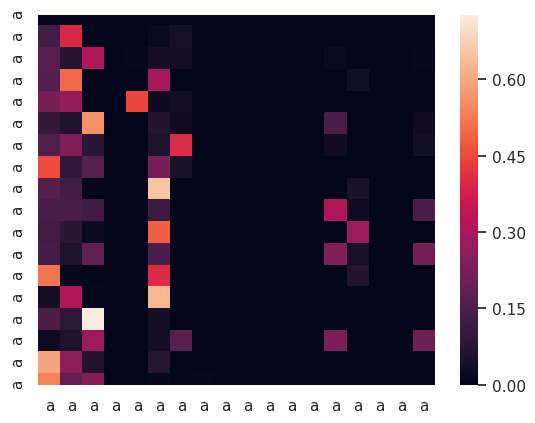

In [17]:

from matplotlib import font_manager
import matplotlib
import numpy as np
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
path_font = '/Library/Fonts/Monaco.ttf'
prop = font_manager.FontProperties(fname='/System/Library/Fonts/Monaco.ttf')
print(prop)
sns.set(font = "Monaco")
ax = sns.heatmap(a_pivot, yticklabels=[i for i in a_pivot.columns.to_list()], fmt="")
ax.set_yticklabels([i for i in a_pivot.columns.to_list()])


In [18]:
prop = font_manager.FontProperties(fname="/System/Library/Fonts/Supplemental/Times New Roman.ttf")
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = prop.get_name()

#sorted(font_manager.findSystemFonts())
plt.imshow(a_pivot, cmap="RdYlBu")
plt.colorbar()
plt.xticks(range(len(a_pivot)), a_pivot.columns)
plt.yticks(range(len(a_pivot)), a_pivot.columns)
plt.show()


: 

: 

In [ ]:
print(sorted(font_manager.findSystemFonts()))
